In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

# Data Loading and Analysis

In [10]:
yogurt_df = pd.read_csv("../datasets/Yogurt100N.csv")

In [11]:
yogurt_df.describe()

,Pan I.D.,Expend $,Income,HH Size,IPT,Quantity,Brand 1,Brand 2,Brand 3,Brand 4,Feature 1,Feature 2,Feature 3,Feature 4,Price 1,Price 2,Price 3,Price 4,PanelistFirstObs
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,48.607819,36.476062,8.720988,2.802058,4.533745,2.585597,0.341975,0.401235,0.029218,0.227572,0.055556,0.039506,0.037449,0.037449,0.106248,0.081532,0.053622,0.079507,0.041152
std,27.858116,31.673291,3.800654,1.173291,14.930892,1.869089,0.474469,0.490249,0.168452,0.419351,0.229109,0.194836,0.189897,0.189897,0.020587,0.011047,0.008054,0.007714,0.198683
min,1.000000,-0.100000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.012000,0.000000,0.025000,0.004000,0.000000
25%,23.000000,12.092500,6.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103000,0.081000,0.050000,0.079000,0.000000
50%,47.000000,27.485001,9.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.108000,0.086000,0.054000,0.079000,0.000000
75%,73.000000,51.712500,12.000000,4.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115000,0.086000,0.061000,0.086000,0.000000
max,100.000000,286.720000,14.000000,6.000000,358.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.193000,0.111000,0.086000,0.104000,1.000000


In [12]:
yogurt_df.head()

,Pan I.D.,Expend $,Income,HH Size,IPT,Quantity,Brand 1,Brand 2,Brand 3,Brand 4,Feature 1,Feature 2,Feature 3,Feature 4,Price 1,Price 2,Price 3,Price 4,PanelistFirstObs
0,1,40.900002,9,2,5,2,0,0,0,1,0,0,0,0,0.108,0.081,0.061,0.079,1
1,1,16.809999,9,2,5,2,0,1,0,0,0,0,0,0,0.108,0.098,0.064,0.075,0
2,1,4.060000,9,2,1,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
3,1,34.459999,9,2,4,2,0,1,0,0,0,0,0,0,0.108,0.098,0.061,0.086,0
4,1,8.390000,9,2,7,2,0,1,0,0,0,0,0,0,0.125,0.098,0.049,0.079,0


We can assume that Pan I.D is a customer identification number. Let's look at the number of records per customer

In [13]:
pan_id_df = yogurt_df.groupby('Pan I.D.')

In [14]:
pan_id_df = pan_id_df['Pan I.D.'].count()

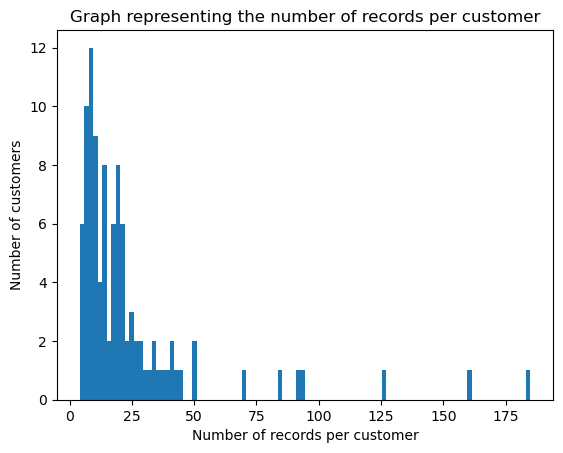

In [15]:
plt.hist(pan_id_df, bins=100)
plt.xlabel("Number of records per customer")
plt.ylabel("Number of customers")
plt.title('Graph representing the number of records per customer')
plt.show()

In [16]:
pan_id_df.describe()

count    100.000000
mean      24.300000
std       29.455839
min        4.000000
25%        9.000000
50%       15.000000
75%       25.000000
max      185.000000
Name: Pan I.D., dtype: float64

Most customers have fewer than 25 records with the average being 24 and 75th percentile being 25. The customer with the most records is 185. 

# Model

In [17]:
"""
fun callable
The objective function to be minimized.

fun(x, *args) -> float

where x is a 1-D array with shape (n,) and args is a tuple of the fixed parameters needed to completely specify the function.
"""
def optimization_func(x):
    a1, a2, a3, bf, bp = x
    v1 = np.exp(a1 + bf*yogurt_df['Feature 1'] + bp*yogurt_df['Price 1'])
    v2 = np.exp(a2 + bf*yogurt_df['Feature 2'] + bp*yogurt_df['Price 2'])
    v3 = np.exp(a3 + bf*yogurt_df['Feature 3'] + bp*yogurt_df['Price 3'])
    v4 = np.exp(0 + bf*yogurt_df['Feature 4'] + bp*yogurt_df['Price 4'])
    loss = (v1*yogurt_df['Brand 1'] + v2*yogurt_df['Brand  2'] + v3*yogurt_df['Brand 3'] + v4*yogurt_df['Brand 4'])/(v1 + v2 + v3 + v4)
    ll = -np.sum(np.log(loss))
    
    return ll


In [18]:
a1, a2, a3, bf, bp = 0, 0, 0, 0, 0
x_init = np.array([a1, a2, a3, bf, bp])
output = opt.minimize(optimization_func, x_init, options={'gtol': 0.001})

In [19]:
output.x

array([  1.3877592 ,   0.64350537,  -3.08612086,   0.48741149,
       -37.05813213])

The parameter estimates from the optimizer are\
a1 = 1.38775208\
a2 = 0.64350485\
a3 = -3.08611349\
bf = 0.48741416\
bp = -37.05787954

In [20]:
max_log_likelihood = -output.fun

In [21]:
max_log_likelihood

-2658.5566975085767

Hence, the logit model for each of the brands are:
Denominator = e^(1.39 + 0.49 * Feature 1 - 37 * Price 1) + e^(0.64 + 0.49 * Feature 2 - 37 * Price 2) + e^(-3.1 + 0.49 * Feature 3 - 37 * Price 3) + e^(0.49 * Feature 4 - 37 * Price 4)

p(brand 1) = e^(1.39 + 0.49 * Feature 1 - 37 * Price 1) / Denominator \
p(brand 2) = e^(0.64 + 0.49 * Feature 2 - 37 * Price 2) / Denominator \
p(brand 3) = e^(-3.1 + 0.49 * Feature 3 - 37 * Price 3) / Denominator \
p(brand 4) = e^(0.49 * Feature 4 - 37 * Price 4) / Denominator

### The optimizer provides the Hessian inverse

In [22]:
output.hess_inv

array([[ 7.29538309e-03,  2.09754074e-03, -2.59629645e-03,
        -1.67957684e-03, -1.52208240e-01],
       [ 2.09754074e-03,  2.92547073e-03,  1.46781039e-03,
        -1.77980197e-04, -1.13779275e-02],
       [-2.59629645e-03,  1.46781039e-03,  2.01715213e-02,
         5.53512291e-04,  1.54378336e-01],
       [-1.67957684e-03, -1.77980197e-04,  5.53512291e-04,
         1.17274540e-02,  5.32376536e-02],
       [-1.52208240e-01, -1.13779275e-02,  1.54378336e-01,
         5.32376536e-02,  5.40918239e+00]])

In [23]:
# Errors are the square root of the diagonal elements
hess = output.hess_inv
diags = np.array([hess[0, 0], hess[1, 1], hess[2, 2], hess[3, 3], hess[4, 4]])
errors = np.sqrt(diags)

In [24]:
errors

array([0.08541301, 0.05408762, 0.14202648, 0.10829337, 2.3257649 ])

In [20]:
OffDiagNeg = np.array([[1, -1, -1, -1, -1], [-1, 1, -1, -1, -1],
                       [-1, -1, 1, -1, -1],[1, -1, -1, 1, -1],[1, -1, -1, -1, 1]])
vcv_mle = output.hess_inv * OffDiagNeg
print('VCV(MLE) = ', vcv_mle)

VCV(MLE) =  [[ 9.38864360e-03 -1.00965547e-02 -3.84964776e-03  1.04296791e-04
  -9.70655311e-03]
 [-1.00965547e-02  1.14645403e-02 -4.32675371e-03  8.71561797e-05
  -1.10090007e-02]
 [-3.84964776e-03 -4.32675371e-03  1.71015680e-02  1.15869657e-03
  -3.69310769e-03]
 [-1.04296791e-04  8.71561797e-05  1.15869657e-03  1.12336299e-02
   3.48053292e-05]
 [ 9.70655311e-03 -1.10090007e-02 -3.69310769e-03  3.48053292e-05
   1.19840644e-02]]
